## PS3 GMM

### Chen Anhua

### Q1

#### (a)

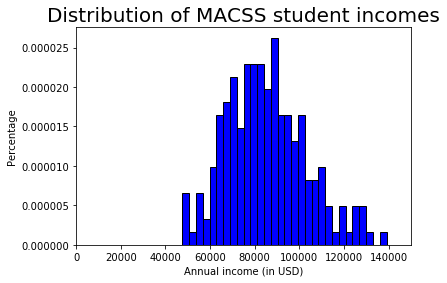

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.optimize import minimize
import scipy.integrate as intgr
import numpy.linalg as lin
from scipy.stats import norm

incomes = np.loadtxt('incomes.txt')

count, bins, ignored = plt.hist(incomes, 30, edgecolor='black', color = "blue", normed=True)
plt.title('Distribution of MACSS student incomes', fontsize=20)
plt.xlabel('Annual income (in USD)')
plt.ylabel('Percentage')
plt.xlim([0, 150000])
plt.show()

#### (b)

In [75]:
## Useful functions

def lognorm_pdf(xvals, mu, sigma):   
    
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi)) 
                * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma ** 2)))
    
    return pdf_vals


def data_moments(xvals):
    mean_data = xvals.mean()
    std_data = xvals.std()
    
    return mean_data, std_data


def model_moments(mu, sigma):
    xfx = lambda x: x * lognorm_pdf(x, mu, sigma)
    (mean_model, m_m_err) = intgr.quad(xfx, 1e-10, 150000)
    x2fx = lambda x: ((x - mean_model) ** 2) * lognorm_pdf(x, mu, sigma) 
    (var_model, v_m_err) = intgr.quad(x2fx, 1e-10, 150000)
    
    std_model = np.sqrt(var_model)
    
    return mean_model, std_model


def err_vec(xvals, mu, sigma, simple):
    mean_data, std_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def crit(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

mu_GMM1= 11.3369099824 , sig_GMM1= 0.213027011191 , criterion value= 3.93979554705e-13
Data Moments Mean = 85276.8236063 , Data Moments Std = 17992.542128
Model Moments Mean = 85276.79520509549 , Model Moments Std = 17992.5325554


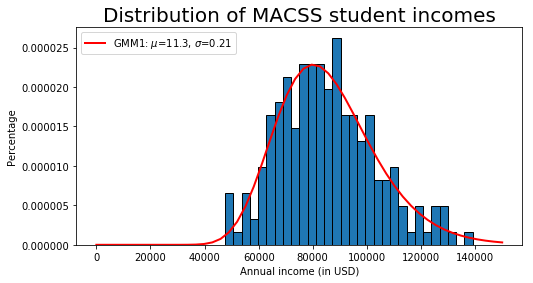

In [76]:
mu_init, sig_init = 11.0, 0.2
bnds = ((1e-10, None), (1e-10, None))

params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (incomes, W_hat)
results = minimize(crit, params_init, args=(gmm_args),
                       method='L-BFGS-B', 
                   bounds=bnds)
mu_GMM1, sig_GMM1 = results.x
GMM1_Value = results.fun[0][0]

print("mu_GMM1=", mu_GMM1, ", sig_GMM1=", sig_GMM1, ", criterion value=", GMM1_Value)

mean_data, std_data = data_moments(incomes)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(incomes, mu_GMM1, sig_GMM1, False).reshape(2,)
print('Data Moments Mean =', mean_data, ', Data Moments Std =', std_data)
print('Model Moments Mean =', mean_model, ', Model Moments Std =', std_model)


dist_incomes = np.linspace(1e-10, 150000)
plt.figure(figsize=(8,4))
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Distribution of MACSS student incomes', fontsize=20)
plt.xlabel('Annual income (in USD)')
plt.ylabel('Percentage')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1: $\mu$=11.3, $\sigma$=0.21')
plt.legend(loc='upper left')
plt.show()

#### (c)

VCV: 
 [[  1.42919942e+14   2.28310860e+14]
 [  2.28310860e+14   3.64720613e+14]]
mu_GMM2= 11.3369101002 , sig_GMM2= 0.213027153206 , criterion value= 4.80699694446e-10
Data Moments Mean = 85276.8236063 , Data Moments Std = 17992.542128
Model Moments Mean = 85276.80420089274 , Model Moments Std = 17992.544691


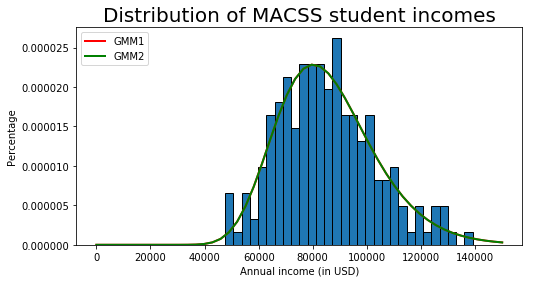

In [77]:
err1 = err_vec(incomes, mu_GMM1, sig_GMM1, False)
VCV2 = np.dot(err1, err1.T) / incomes.shape[0]
W_hat2 = lin.pinv(VCV2)
print("VCV: \n",W_hat2)
mu_init = mu_GMM1
sig_init = sig_GMM1
params_init = np.array([mu_GMM1, sig_GMM1])
gmm_args = (incomes, W_hat2)
results2 = minimize(crit, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results2.x
GMM2_Value = results2.fun[0][0]
print("mu_GMM2=", mu_GMM2, ", sig_GMM2=", sig_GMM2, ", criterion value=", GMM2_Value)
mean_data, std_data = data_moments(incomes)
mean_model, std_model = model_moments(mu_GMM2, sig_GMM2)
err1 = err_vec(incomes, mu_GMM2, sig_GMM2, False).reshape(2,)
print('Data Moments Mean =', mean_data, ', Data Moments Std =', std_data)
print('Model Moments Mean =', mean_model, ', Model Moments Std =', std_model)

dist_incomes = np.linspace(1e-10, 150000)
plt.figure(figsize=(8,4))
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Distribution of MACSS student incomes', fontsize=20)
plt.xlabel('Annual income (in USD)')
plt.ylabel('Percentage')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM2, sig_GMM2),
         linewidth=2, color='g', label='GMM2')

plt.legend(loc='upper left')
plt.show()

Two set of estimates are very close

#### (d)


In [80]:
def data_moments2(xvals):
    dat_m1 = sum(xvals < 75000) / len(xvals)
    dat_m2 = sum(np.all((incomes >= 75000, incomes < 100000), axis = 0))/len(xvals)
    dat_m3 = sum((xvals >= 100000))/len(xvals)

    return dat_m1, dat_m2, dat_m3



def model_moments2(mu, sigma):
    xfx = lambda x: sts.lognorm.pdf(x, scale = np.exp(mu), s=sigma)
    (m1, err1) = intgr.quad(xfx, 0, 75000)
    (m2, err2) = intgr.quad(xfx, 75000, 100000)
    (m3, err3) = intgr.quad(xfx, 100000, np.inf)
    return m1, m2, m3

def err_vec2(xvals, mu, sigma):
    dat_m1, dat_m2, dat_m3 = data_moments2(xvals)
    moms_data = np.array([[dat_m1], [dat_m2], [dat_m3]])
    mod_m1, mod_m2, mod_m3 = model_moments2(mu, sigma)
    moms_model = np.array([[mod_m1], [mod_m2], [mod_m3]])
    err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

def crit2(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec2(xvals, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [81]:
mu_init, sig_init = 11, 0.2

W_hat = np.eye(3)
gmm_args = (incomes, W_hat)
bnds = ((1e-10, None), (1e-10, None))
results3 = minimize(crit2, params_init, args=(gmm_args),
                       method='L-BFGS-B',
                       bounds=bnds)
mu_GMM3, sig_GMM3 = results3.x
GMM3_Value = results3.fun[0][0]
print("mu_GMM3=", mu_GMM3, ", sig_GMM3=", sig_GMM3, ", criterion value=", GMM3_Value)

mu_GMM3= 11.3356813274 , sig_GMM3= 0.21059845376 , criterion value= 2.53621457332e-15


Data moments:
< 75000 : 0.3 , 75000 - 100000: 0.5 , >= 100000: 0.2
Model moments:
< 75000 : 0.30000000371987273 , 75000 - 100000: 0.5000000057658724 , >= 100000: 0.19999999051425502


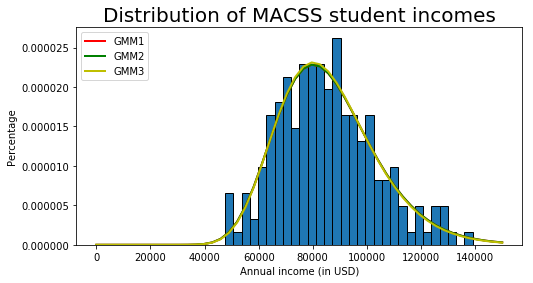

In [83]:
dat1, dat2, dat3 = data_moments2(incomes)
m1, m2, m3 = model_moments2(mu_GMM3, sig_GMM3)
print("Data moments:")
print('< 75000 :', dat1, ', 75000 - 100000:', dat2, ', >= 100000:', dat3)
print("Model moments:")
print('< 75000 :', m1, ', 75000 - 100000:', m2, ', >= 100000:', m3)
dist_incomes = np.linspace(1e-10, 150000)
plt.figure(figsize=(8,4))
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Distribution of MACSS student incomes', fontsize=20)
plt.xlabel('Annual income (in USD)')
plt.ylabel('Percentage')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM2, sig_GMM2),
         linewidth=2, color='g', label='GMM2')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM3, sig_GMM3),
         linewidth=2, color='y', label='GMM3')

plt.legend(loc='upper left')
plt.show()

By eyeballing, the results are very similar

#### (e)

In [85]:
err3 = err_vec2(incomes, mu_GMM3, sig_GMM3).reshape(3, 1)
VCV3 = np.dot(err3, err3.T)/ len(incomes)
W_hat3 = lin.pinv(VCV3)
print("VCV: \n", VCV3)

mu_init, sig_init = mu_GMM3, sig_GMM3

params_init = np.array([mu_init, sig_init])
gmm_args = (incomes, W_hat3)
bnds = ((1e-10, None), (1e-10, None))

results4 = minimize(crit2, params_init, args=(gmm_args),
                       method='L-BFGS-B', 
                    bounds=bnds)
mu_GMM4, sig_GMM4 = results4.x
GMM4_Value = results4.fun[0][0]
print("mu_GMM4=", mu_GMM4, ", sig_GMM4=", sig_GMM4, ", criterion value=", GMM4_Value)

VCV: 
 [[  7.68747401e-19   7.14943725e-19  -2.94048035e-18]
 [  7.14943725e-19   6.64905701e-19  -2.73467978e-18]
 [ -2.94048035e-18  -2.73467978e-18   1.12474198e-17]]


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


mu_GMM4= 11.3356811827 , sig_GMM4= 0.21059866022 , criterion value= 0.34400396115


#### (f)
Given the lower criterion value in (d), I would suggest use the identification strategy in part (d)

### Q2

#### (a)

In [93]:
sick = pd.read_csv('sick.txt')
sick.insert(loc = 1, value=1, column="constant")    # insert constant column


def ols_model_moments(xvals, yvals, betas):
    return (yvals - xvals @ betas).T @ (yvals - xvals @ betas)

def ols_crit(params, args):
    xvals = args.iloc[:, 1:].values
    yvals = args.iloc[:, 0].values
    return ols_model_moments(xvals, yvals, params)
params_init = np.array([0, 0, 0, 0])
results = minimize(ols_crit,  params_init, 
                       args=sick, 
                       method = 'L-BFGS-B')
print("Estimates: ", results.x)
print("Criterion value: ", results.fun)



Estimates:  [ 0.25164552  0.01293354  0.40050038 -0.00999177]
Criterion value:  0.00182128981437
